1 - Read and Clean the Data

In [1]:
#Import necessary libraries
import pandas as pd

#Read data
data = pd.read_feather(r"C:\Users\omerf\OneDrive\Masaüstü\Data Analysis Project\Sales Data/Sales_data.ftr")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [2]:
#Check for missing values
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [3]:
#Drop missing values
data = data.dropna(how="all")
#Check it now
data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [4]:
#Check for duplicates
data[data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [5]:
#Drop duplicates
data = data.drop_duplicates()
#Check it now
data[data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


2 - Analyze Which City has Maximum Order

In [6]:
#Extract city from the data
data["Purchase Address"].head(2)

0         917 1st St, Dallas, TX 75001
2    682 Chestnut St, Boston, MA 02215
Name: Purchase Address, dtype: object

In [25]:
#Extract city and create a new city object
data["City"] = data["Purchase Address"].str.split(",").str.get(1)
data["City"].head(2)

0     Dallas
2     Boston
Name: City, dtype: object

Text(0, 0.5, '')

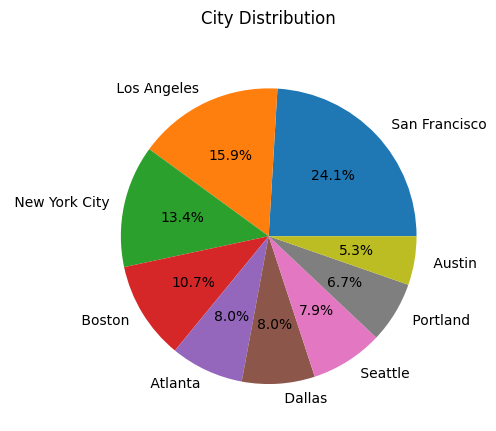

In [28]:
#Plot the data now as pie chart
import matplotlib.pyplot as plt

city_counts = data['City'].value_counts()

city_counts.plot(kind="pie", autopct = "%1.1f%%")

plt.title("City Distribution", pad = 20)

plt.ylabel("")

San Francisco, Los Angeles and New York City are the top 3 cities with the highest number of orders. Austin, Portland and Seatle are the top 3 cities with the fewest number of orders.